In [1]:
# import Required liberary
import numpy as np # for numerical calculation
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sb # for data visualization
import warnings # to ignore warining notification
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose # to view the data has trend,seasonal and residual

from statsmodels.tsa.stattools import acf,pacf,adfuller # adfuller to check stationary

from statsmodels.tsa.arima.model import ARIMA # to build AR,MA and ARMA model

import statsmodels.api as sm # to find p and q value 

from sklearn.metrics import mean_squared_error # to find the error 

# Task 1 
Data Preparation

In [3]:
# 1) import dataset
# 2) conerting it into proper time seies data format
df = pd.read_csv('DS3_C1_S3_SuperstoreSales_Data_Challenge.csv',parse_dates=['Order Date'],index_col=['Order Date'])
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-08-11,1,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-08-11,2,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-12-06,3,CA-2016-138688,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-11-10,4,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-11-10,5,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# 3 sort the data with respect to data
df1=df[['Sales']].sort_index(ascending=True)

In [4]:
df1.head()

,Sales
Order Date,
2014-01-02,468.900
2014-01-03,634.116
2014-01-03,362.250
2014-01-03,63.552
2014-01-03,5.940


In [5]:
# 4. Resample the data by month

df_resample=df1.resample('M').mean()
df_resample=pd.DataFrame(df_resample)
df_resample.head()

,Sales
Order Date,
2014-01-31,221.020656
2014-02-28,148.175674
2014-03-31,326.201821
2014-04-30,204.215008
2014-05-31,200.269149


In [6]:
# 5) check missing values
df_resample.isnull().sum()

Sales    0
dtype: int64

In [7]:
df_resample

,Sales
Order Date,
2014-01-31,221.020656
2014-02-28,148.175674
2014-03-31,326.201821
2014-04-30,204.215008
2014-05-31,200.269149
2014-06-30,213.773946
2014-07-31,226.546449
2014-08-31,252.363650
2014-09-30,276.611815


**NO null value can do further analysis**

<AxesSubplot:xlabel='Sales'>

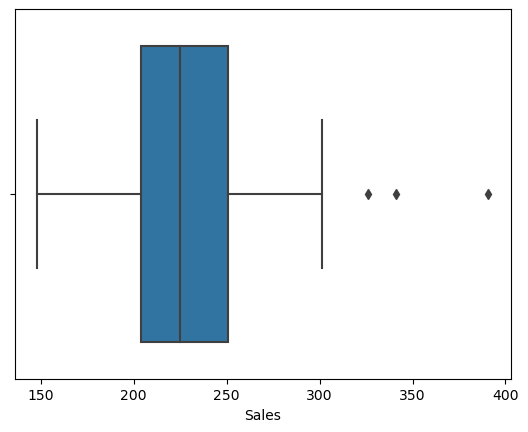

In [8]:
# 6) Check any outliyers
sb.boxplot(x=df_resample['Sales'])

In [9]:
df_out= df_resample[df_resample['Sales']<300]
df_out

,Sales
Order Date,
2014-01-31,221.020656
2014-02-28,148.175674
2014-04-30,204.215008
2014-05-31,200.269149
2014-06-30,213.773946
2014-07-31,226.546449
2014-08-31,252.363650
2014-09-30,276.611815
2014-10-31,238.358255


In [10]:
# data decomposition
decomposition = seasonal_decompose(df_out,period=12)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid


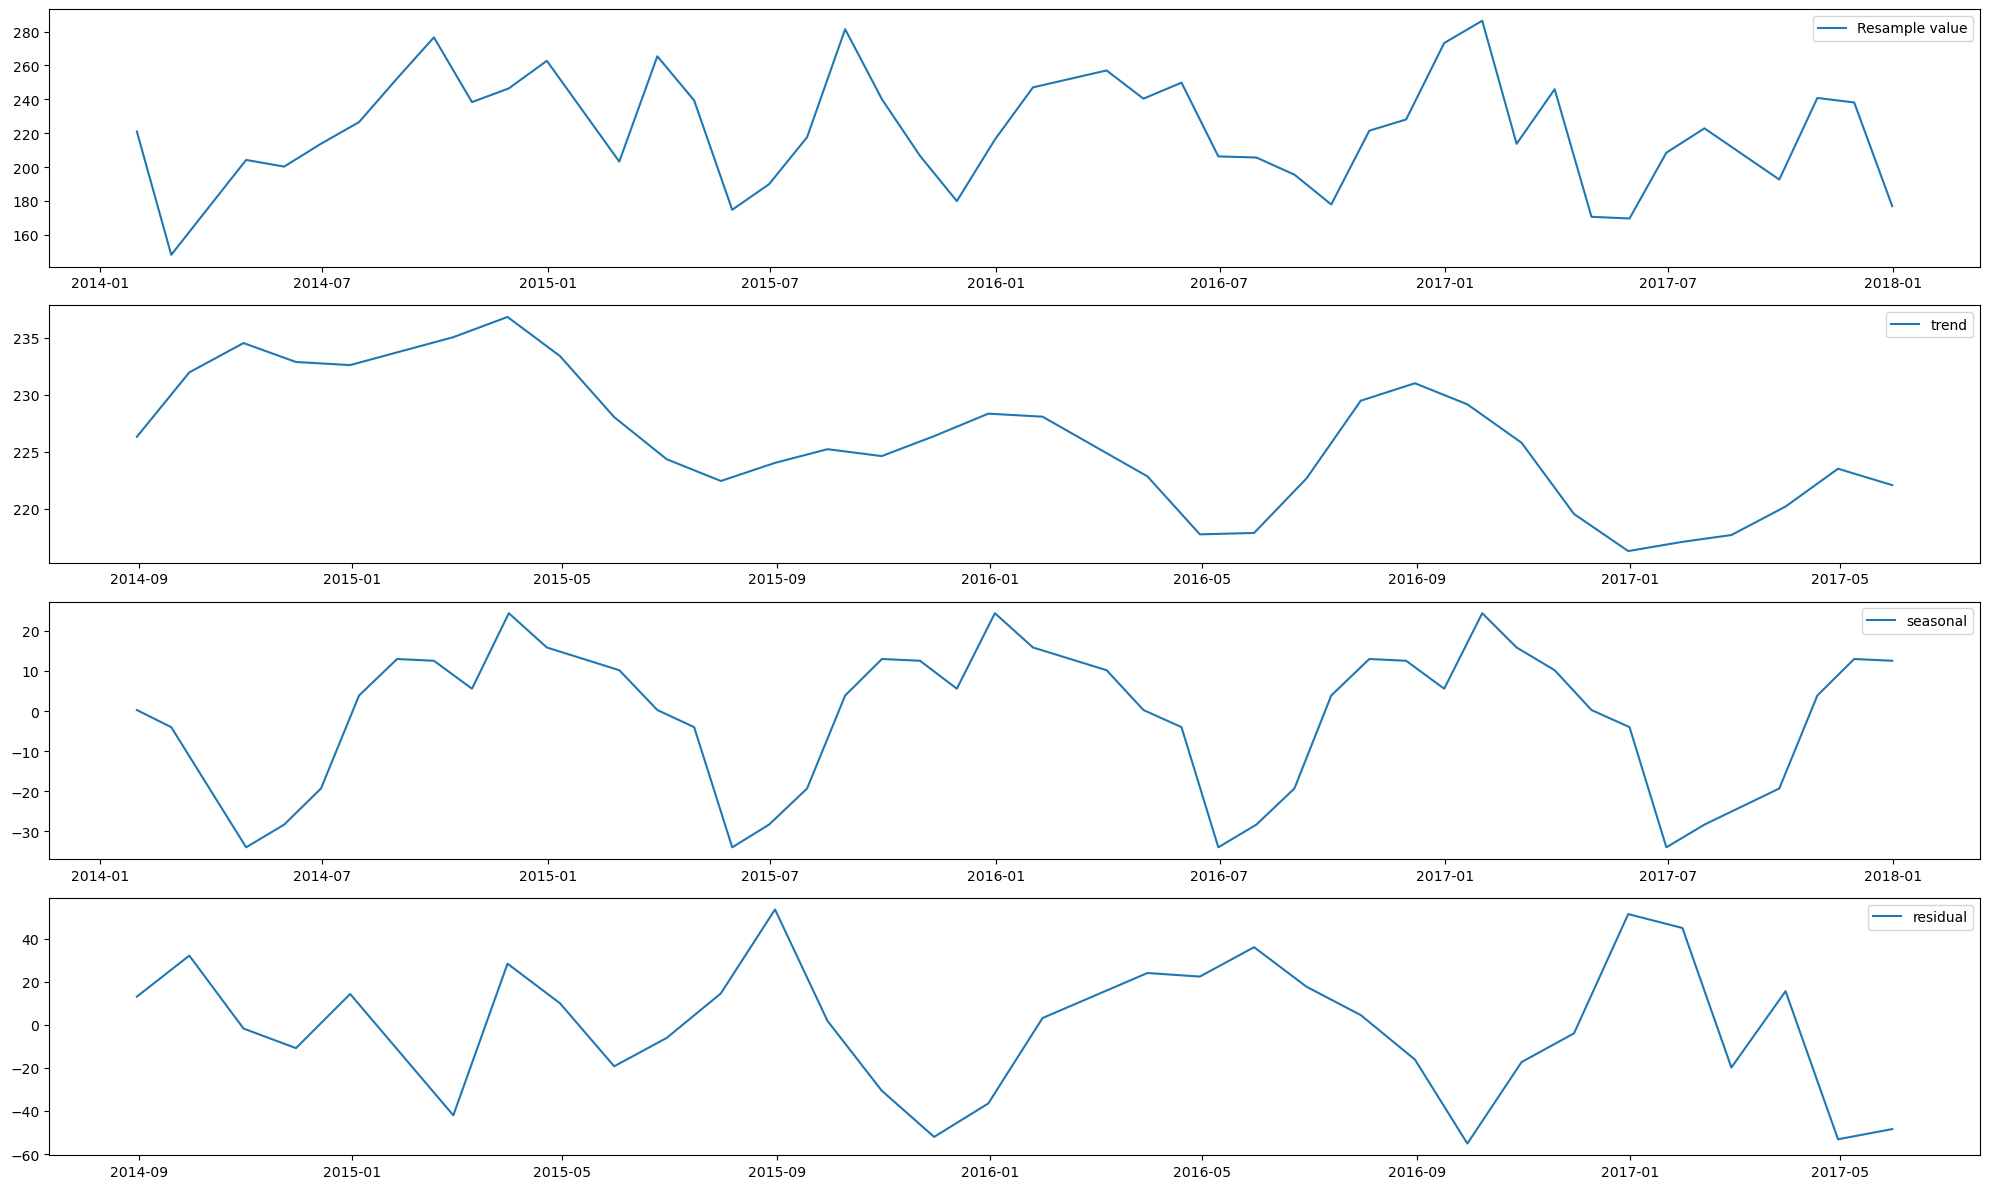

In [11]:
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(df_out,label='Resample value')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='residual')
plt.legend()

plt.tight_layout()

# Task 2 
    Stationarity

In [12]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if (pvalue>0.05):
        msg = 'P-value= {}. Data is not stationary'.format(pvalue)
    else:
        msg = 'P-value= {}. Data is Stationary'.format(pvalue)
    return(msg)

In [13]:
checkStationarity(df_out)

'P-value= 0.0002952964379312092. Data is Stationary'

# Task 3
    Time Series Models

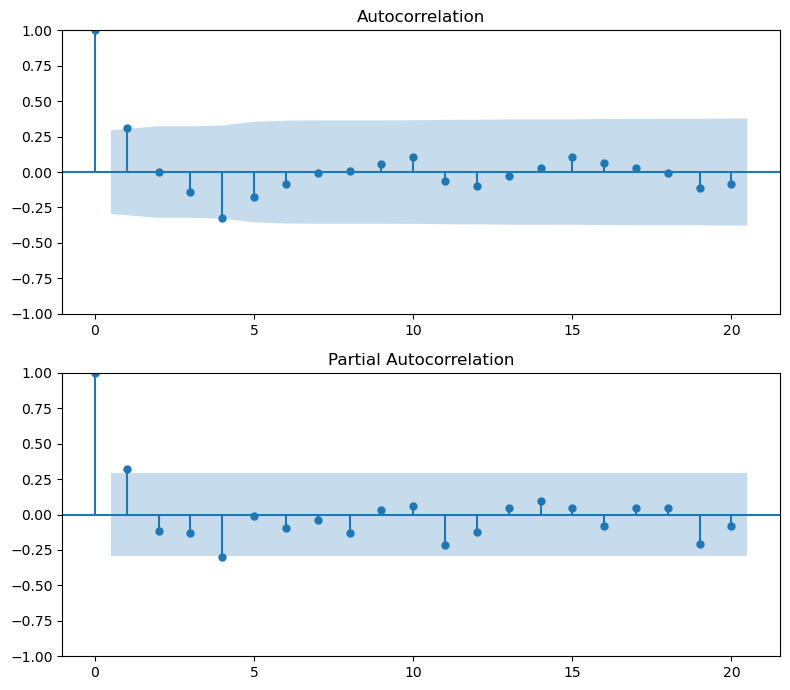

In [14]:
# 1) ACF and PACF to decide the order of the model with 20 lags. Note p and q values
fig = plt.figure(figsize=(8,7))

ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_out,lags=20,ax= ax1)

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_out, lags = 20 , ax= ax2)

plt.tight_layout()

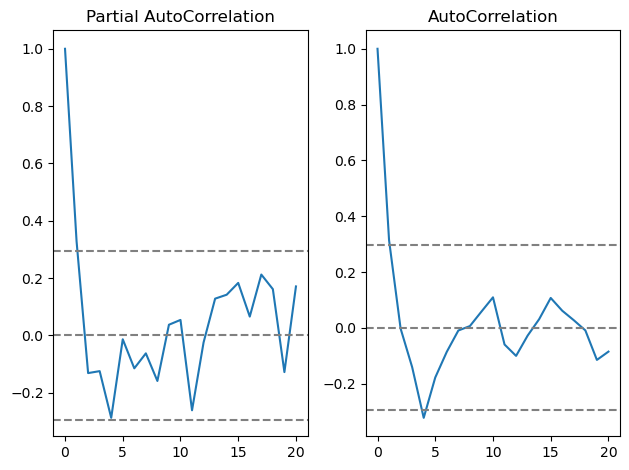

In [15]:
# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(df_out, nlags=20)
lag_pacf = pacf(df_out, nlags=20, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df_out)),linestyle='--',color="gray") #threshold for 95% of CI
plt.axhline(y=1.96/np.sqrt(len(df_out)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

#(show z- transform table)
# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df_out)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(df_out)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

# AR model

In [25]:
df2=df_out['Sales']
df2

Order Date
2014-01-31    221.020656
2014-02-28    148.175674
2014-04-30    204.215008
2014-05-31    200.269149
2014-06-30    213.773946
2014-07-31    226.546449
2014-08-31    252.363650
2014-09-30    276.611815
2014-10-31    238.358255
2014-11-30    246.454823
2014-12-31    262.756284
2015-02-28    203.219137
2015-03-31    265.432540
2015-04-30    239.352003
2015-05-31    174.766749
2015-06-30    189.882883
2015-07-31    217.654364
2015-08-31    281.429933
2015-09-30    240.033558
2015-10-31    206.613387
2015-11-30    179.901805
2015-12-31    216.257738
2016-01-31    247.066130
2016-03-31    257.057228
2016-04-30    240.384457
2016-05-31    249.862776
2016-06-30    206.306577
2016-07-31    205.641322
2016-08-31    195.527377
2016-09-30    177.903145
2016-10-31    221.475212
2016-11-30    228.114625
2016-12-31    273.236537
2017-01-31    286.435004
2017-02-28    213.724314
2017-03-31    245.967381
2017-04-30    170.620094
2017-05-31    169.636707
2017-06-30    208.481771
2017-07-31    

In [32]:
ar_m1 = ARIMA(df2,order = (1,0,0)).fit() # with p = 1
ar_m1.summarymary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   44
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -213.584
Date:                Sat, 09 Sep 2023   AIC                            433.168
Time:                        15:19:14   BIC                            438.520
Sample:                             0   HQIC                           435.153
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        221.6465      7.296     30.380      0.000     207.347     235.946
ar.L1          0.3208      0.193      1.661      0.097      -0.058       0.699
sigma2       961.0585    237.199      4.052      0.000     496.156    1425.961
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.75   Prob(JB):                         0.69
Heteroskedasticity (H):               1.03   Skew:                            -0.22
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
ar_m2= ARIMA(df2,order=(2,0,0)).fit() # with p = 2
ar_m2.summaryary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   44
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -213.195
Date:                Sat, 09 Sep 2023   AIC                            434.390
Time:                        15:20:33   BIC                            441.527
Sample:                             0   HQIC                           437.036
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        222.1151      6.593     33.692      0.000     209.194     235.036
ar.L1          0.3707      0.199      1.864      0.062      -0.019       0.761
ar.L2         -0.1439      0.176     -0.819      0.413      -0.488       0.200
sigma2       943.2476    229.187      4.116      0.000     494.048    1392.447
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.92   Prob(JB):                         0.77
Heteroskedasticity (H):               1.00   Skew:                            -0.15
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
ar_m3 = ARIMA(df2,order = (3,0,0)).fit() # with p = 3
ar_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   44
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -212.853
Date:                Sat, 09 Sep 2023   AIC                            435.706
Time:                        15:21:20   BIC                            444.627
Sample:                             0   HQIC                           439.014
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        222.3153      6.057     36.704      0.000     210.444     234.187
ar.L1          0.3536      0.194      1.822      0.068      -0.027       0.734
ar.L2         -0.0901      0.186     -0.485      0.627      -0.454       0.274
ar.L3         -0.1332      0.145     -0.920      0.358      -0.417       0.151
sigma2       927.5632    230.429      4.025      0.000     475.931    1379.195
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.83   Prob(JB):                         0.71
Heteroskedasticity (H):               0.95   Skew:                            -0.17
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretation:
AIC score of AR(1) model is 433.168

AIC score of AR(2) model is 434.390

AIC score of AR(3) model is 435.706

Lesser the AIC score is better the model. Hence AR(1) is the better model

# MA model 

In [40]:
ma_m1 = ARIMA(df2,order=(0,0,1)).fit() # with q = 1
ma_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   44
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -213.284
Date:                Sat, 09 Sep 2023   AIC                            432.569
Time:                        15:25:34   BIC                            437.921
Sample:                             0   HQIC                           434.554
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        221.9497      6.477     34.267      0.000     209.255     234.644
ma.L1          0.3714      0.159      2.340      0.019       0.060       0.683
sigma2       947.1787    228.681      4.142      0.000     498.973    1395.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.99   Prob(JB):                         0.78
Heteroskedasticity (H):               1.02   Skew:                            -0.16
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
ma_m2 = ARIMA(df2,order=(0,0,2)).fit() # with q = 2
ma_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   44
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -213.276
Date:                Sat, 09 Sep 2023   AIC                            434.552
Time:                        15:25:45   BIC                            441.688
Sample:                             0   HQIC                           437.198
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        222.0134      6.666     33.308      0.000     208.949     235.078
ma.L1          0.3688      0.201      1.833      0.067      -0.026       0.763
ma.L2         -0.0284      0.214     -0.133      0.894      -0.448       0.391
sigma2       946.6266    227.859      4.154      0.000     500.031    1393.222
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.99   Prob(JB):                         0.80
Heteroskedasticity (H):               1.02   Skew:                            -0.14
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
ma_m3 = ARIMA(df2,order=(0,0,3)).fit() # with q = 3
ma_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   44
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -213.249
Date:                Sat, 09 Sep 2023   AIC                            436.498
Time:                        15:25:56   BIC                            445.419
Sample:                             0   HQIC                           439.806
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        221.8530      7.255     30.580      0.000     207.634     236.072
ma.L1          0.3906      0.202      1.929      0.054      -0.006       0.787
ma.L2          0.0213      0.230      0.093      0.926      -0.430       0.473
ma.L3          0.0548      0.189      0.290      0.772      -0.316       0.425
sigma2       945.1012    226.811      4.167      0.000     500.559    1389.643
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.95   Prob(JB):                         0.78
Heteroskedasticity (H):               1.03   Skew:                            -0.17
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretation:
AIC score of MR(1) model is 432.569

AIC score of MR(2) model is 434.552

AIC score of MR(3) model is 436.498

Lesser the AIC score is better the model. Hence MR(1) is the better model

# ARMA model

In [43]:
p= 1; q= 1
arma = ARIMA(df2,order=(p,0,q)).fit()
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   44
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -213.268
Date:                Sat, 09 Sep 2023   AIC                            434.536
Time:                        15:43:17   BIC                            441.673
Sample:                             0   HQIC                           437.183
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        222.1073      6.369     34.874      0.000     209.624     234.590
ar.L1         -0.1495      0.542     -0.276      0.782      -1.211       0.912
ma.L1          0.5149      0.432      1.193      0.233      -0.331       1.361
sigma2       946.0231    227.771      4.153      0.000     499.599    1392.447
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.96   Prob(JB):                         0.81
Heteroskedasticity (H):               1.02   Skew:                            -0.13
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
p,q= (2,1)
arma2 = ARIMA(df2,order = (p,0,q)).fit()
arma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   44
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -211.156
Date:                Sat, 09 Sep 2023   AIC                            432.313
Time:                        15:44:41   BIC                            441.234
Sample:                             0   HQIC                           435.621
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        224.3621      2.372     94.594      0.000     219.713     229.011
ar.L1          1.2035      0.240      5.014      0.000       0.733       1.674
ar.L2         -0.4181      0.193     -2.161      0.031      -0.797      -0.039
ma.L1         -0.9999     61.845     -0.016      0.987    -122.213     120.213
sigma2       815.9166   5.04e+04      0.016      0.987   -9.79e+04    9.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.95   Prob(JB):                         0.91
Heteroskedasticity (H):               1.05   Skew:                            -0.15
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
p,q = (2,2)
arma3 = ARIMA(df2,order = (p,0,q)).fit()
arma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   44
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -211.303
Date:                Sat, 09 Sep 2023   AIC                            434.605
Time:                        15:45:32   BIC                            445.311
Sample:                             0   HQIC                           438.575
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        224.1131      2.946     76.072      0.000     218.339     229.887
ar.L1          1.3210      0.326      4.050      0.000       0.682       1.960
ar.L2         -0.6078      0.334     -1.822      0.069      -1.262       0.046
ma.L1         -1.0816      0.408     -2.653      0.008      -1.881      -0.282
ma.L2          0.2276      0.452      0.503      0.615      -0.659       1.114
sigma2       855.5669    193.814      4.414      0.000     475.698    1235.436
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.97   Prob(JB):                         0.97
Heteroskedasticity (H):               0.98   Skew:                            -0.09
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretation:
AIC score of ARMA(1) model is 434.536

AIC score of ARMA(2) model is 432.313

AIC score of ARMA(3) model is 434.605

Lesser the AIC score is better the model. Hence ARMA(2) is the better model

In [ ]:
Spliting data

In [48]:
ss = int(0.7 * len(df2))

train = df2.iloc[:ss]
test = df2.iloc[ss:]

print("Train = {}, test = {}".format(len(train), len(test)))

Train = 30, test = 14


# Prediction

In [49]:
# Prediction 
Prediction = arma2.predict(0,len(test)-1)
Prediction

Order Date
2014-01-31    224.362105
2014-02-28    223.323508
2014-04-30    197.514482
2014-05-31    226.173881
2014-06-30    226.619263
2014-07-31    233.175402
2014-08-31    237.411199
2014-09-30    243.505395
2014-10-31    245.095065
2014-11-30    225.593709
2014-12-31    225.683824
2015-02-28    226.663262
2015-03-31    204.878794
2015-04-30    225.553291
Name: predicted_mean, dtype: float64

In [53]:
actual = []; pred = []

for i in range (len(Prediction)):
    actual.append(test[i])
    pred.append(Prediction[i])
    
df_res = pd.DataFrame({'actual':actual,'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
df_res

,actual,predicted,err
0,221.475212,224.362105,-2.886893
1,228.114625,223.323508,4.791117
2,273.236537,197.514482,75.722056
3,286.435004,226.173881,60.261123
4,213.724314,226.619263,-12.894949
5,245.967381,233.175402,12.791979
6,170.620094,237.411199,-66.791104
7,169.636707,243.505395,-73.868688
8,208.481771,245.095065,-36.613294
9,222.877408,225.593709,-2.716302


# plot the error

<AxesSubplot:>

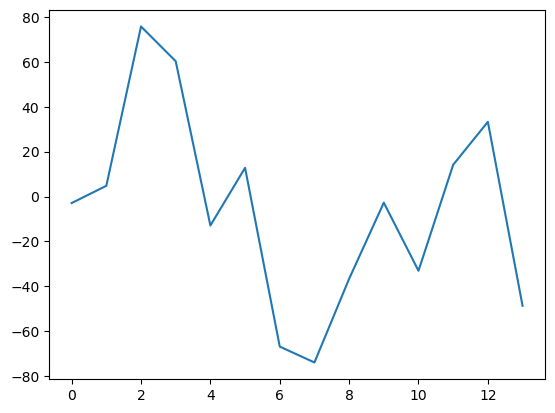

In [54]:
df_res.err.plot() # to plot error value

In [55]:
# Ljung-Box test
pvalue = sm.stats.acorr_ljungbox(arma2.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print('Reject H0. Bad model')
else:
    print('Fail to Reject H0. Good model')

Fail to Reject H0. Good model


In [58]:
# MSE and RMSE value
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(2,2)
	MSE = 1839.7344176688432
	RMSE = 42.892125357329206


Text(0.5, 1.0, 'ARMA Model. Order=(2,2)')

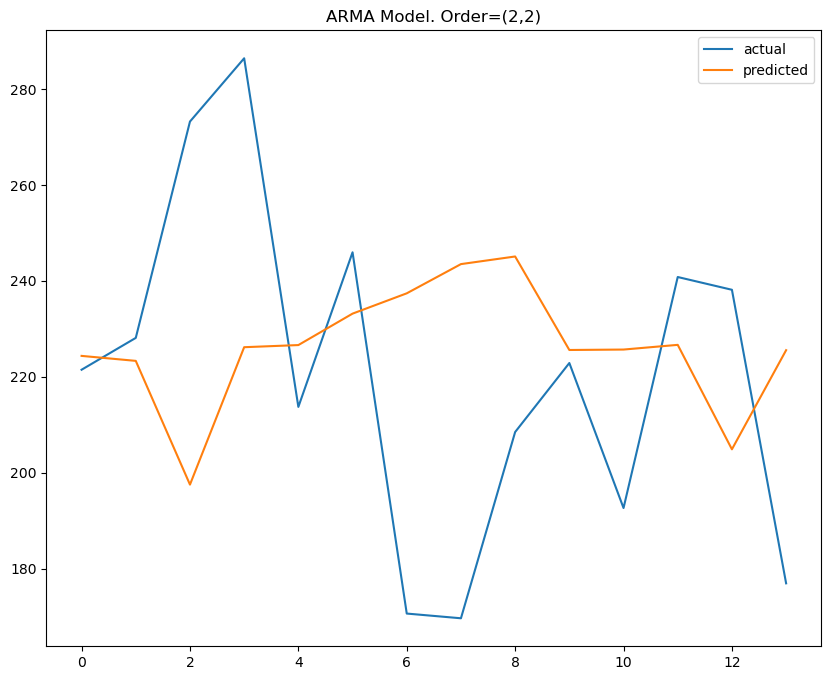

In [59]:
df_res.actual.plot(figsize = (10,8),legend=True) # actual value
df_res.predicted.plot(legend=True) # Forcasted value
plt.title(msg)